<a href="https://colab.research.google.com/github/shahjamanbadhon/Data-Mining/blob/main/Standardization_and_min_max_normalization_(Scaling)_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/shahjamanbadhon/Data-Sets/refs/heads/main/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [6]:
x = data[["Age","EstimatedSalary"]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y = data["Purchased"]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8) #train,test then target train,test...when random choose it choose a touple of a row

In [27]:
x_train

,Age,EstimatedSalary
232,40,107000
165,18,86000
347,54,108000
53,35,23000
38,26,72000
...,...,...
196,30,79000
256,41,72000
25,47,20000
28,29,43000


Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(x_train)

StandardScaler()

In [33]:
#scaler.mean_

array([3.7656250e+01, 6.8334375e+04])

In [51]:
x_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [52]:
pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

,Age,EstimatedSalary
0,0.221965,1.141772
1,-1.861548,0.521655
2,1.547837,1.171301
3,-0.251561,-1.338696
4,-1.103907,0.108244
...,...,...
315,-0.725086,0.314949
316,0.316670,0.108244
317,0.884901,-1.427284
318,-0.819791,-0.748108


In [53]:
x_train_scalled = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

In [54]:
x_train_scalled

,Age,EstimatedSalary
0,0.221965,1.141772
1,-1.861548,0.521655
2,1.547837,1.171301
3,-0.251561,-1.338696
4,-1.103907,0.108244
...,...,...
315,-0.725086,0.314949
316,0.316670,0.108244
317,0.884901,-1.427284
318,-0.819791,-0.748108


In [55]:
x_test_scalled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [56]:
x_test_scalled

,Age,EstimatedSalary
0,1.831953,0.167302
1,-0.251561,0.137773
2,-1.293317,-0.393756
3,-1.198612,-1.043402
4,0.127260,-0.275638
...,...,...
75,-0.062150,0.728360
76,-0.062150,0.196832
77,-0.251561,0.108244
78,-1.198612,0.551184


In [57]:
np.round(x_train_scalled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.7
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.4


Graphically

In [69]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Comparison of Originial and Scaled Data')

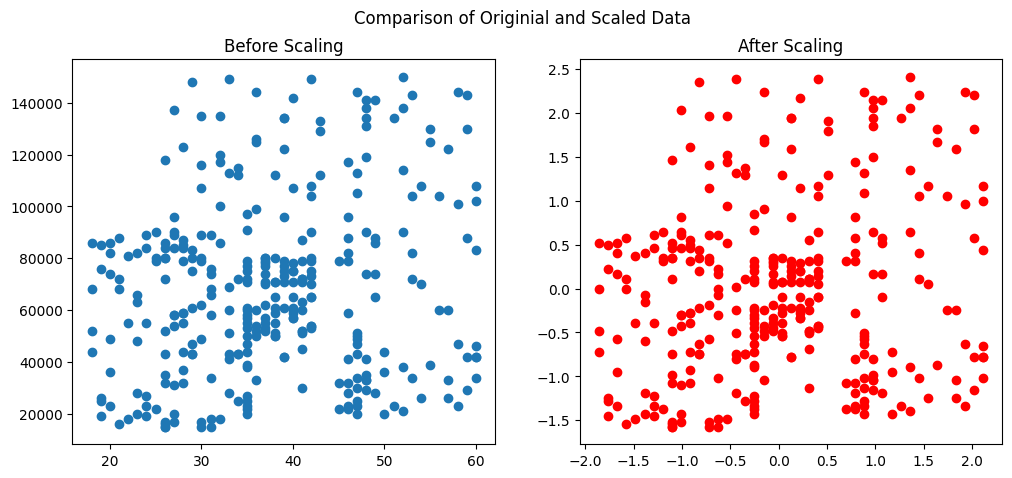

In [78]:
fig,(fig1,fig2) = plt.subplots(ncols=2,figsize=(12,5)) #figsize(height,width)
fig1.scatter(x_train["Age"],x_train["EstimatedSalary"])
fig2.scatter(x_train_scalled["Age"],x_train_scalled["EstimatedSalary"],color="red")
fig2.set_title("After Scaling")
fig1.set_title("Before Scaling")
fig.suptitle("Comparison of Originial and Scaled Data") #Main figure title

# Normalization

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
minmax = MinMaxScaler()

In [82]:
minmax.fit(x_train)

MinMaxScaler()

In [84]:
#minmax.transform(x_train)
x_train_minmax = pd.DataFrame(minmax.transform(x_train),columns=x_train.columns)

In [85]:
x_train_minmax

,Age,EstimatedSalary
0,0.523810,0.681481
1,0.000000,0.525926
2,0.857143,0.688889
3,0.404762,0.059259
4,0.190476,0.422222
...,...,...
315,0.285714,0.474074
316,0.547619,0.422222
317,0.690476,0.037037
318,0.261905,0.207407


In [86]:
x_test_minmax = pd.DataFrame(minmax.transform(x_test),columns=x_test.columns)

In [87]:
x_test_minmax

,Age,EstimatedSalary
0,0.928571,0.437037
1,0.404762,0.429630
2,0.142857,0.296296
3,0.166667,0.133333
4,0.500000,0.325926
...,...,...
75,0.452381,0.577778
76,0.452381,0.444444
77,0.404762,0.422222
78,0.166667,0.533333


Text(0.5, 0.98, 'Comparison of Originial and Scaled Data')

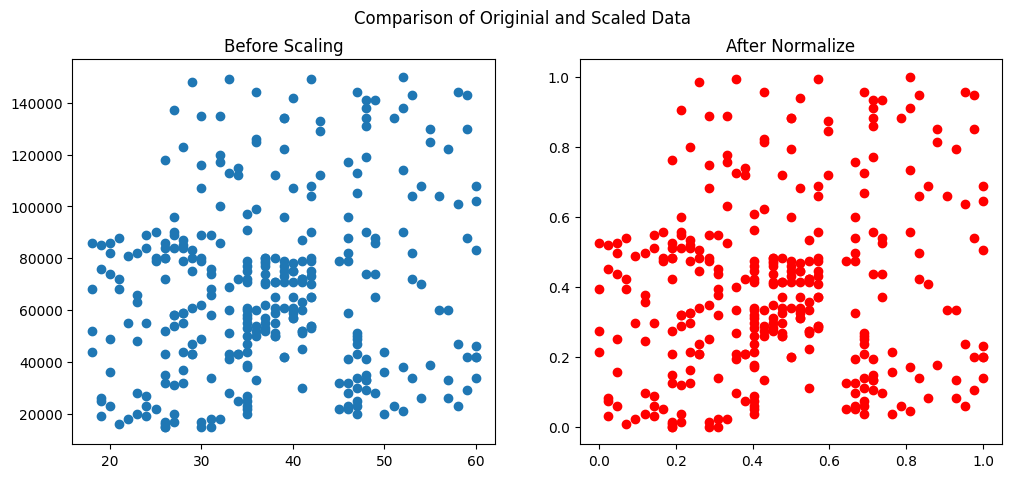

In [88]:
fig,(fig1,fig2) = plt.subplots(ncols=2,figsize=(12,5)) #figsize(height,width)
fig1.scatter(x_train["Age"],x_train["EstimatedSalary"])
fig2.scatter(x_train_minmax["Age"],x_train_minmax["EstimatedSalary"],color="red")
fig2.set_title("After Normalize")
fig1.set_title("Before Scaling")
fig.suptitle("Comparison of Originial and Scaled Data") #Main figure title